In [2]:
import os
os.chdir('..')

In [17]:
pwd

'/mnt/md1/user_victor/automatic_melody_harmonization'

In [18]:
import numpy as np
import torch 
from tonal import tonal_centroid, chord482note, chord962note, note2number
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
melody = np.load('./data/melody_baseline.npy')
chord = np.load('./data/number_96.npy')
chord_onehot = np.load('./data/onehot_96.npy')
length = np.load('./data/length.npy')

In [19]:
chord_onehot[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

chord_sequence (272, 96)
melody_sequence (272, 576)
length 45


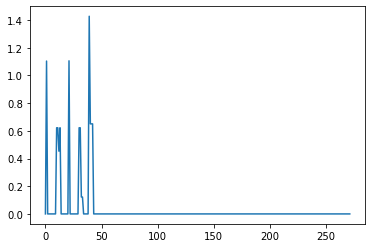

In [54]:
## MCTD

i = 8
MCTD_seq = []
chord_sequence = chord_onehot[i]
melody_sequence = melody[i]
print('chord_sequence',chord_sequence.shape)
print('melody_sequence',melody_sequence.shape)
print('length',length[i])

def create_MCTD_seq(chord_sequence,melody_sequence):
    chord_index = np.argmax(chord_sequence, axis=1)
    chord_note = []

    for i in chord_index:
        chord_note.append(note2number(chord962note(i)))

    melody_sequence = melody_sequence.reshape((melody_sequence.shape[0] * 48, 12))
    melody_index = my_argmax(melody_sequence)
    melody_index = melody_index.reshape((-1, 48))

    for melody_m, chord_m in zip(melody_index, chord_note):
        count = 0
        MCTD = 0

        for m in melody_m:
            if m != -1:
                MCTD += np.sqrt(np.sum((np.asarray(tonal_centroid([m])) - np.asarray(tonal_centroid(chord_m)))) ** 2)
                count += 1

        if count != 0:
            MCTD_seq.append(MCTD / count)
        else:
            MCTD_seq.append(0)
    
    return MCTD_seq

MCTD_sequence = create_MCTD_seq(chord_sequence,melody_sequence)
fig, ax = plt.subplots()
ax.plot(MCTD_seq)

In [ ]:
MCTD_seqs = []

for i in tqdm(range(melody.shape[0])):
    MCTD_seqs.append(create_MCTD_seq(chord_onehot[i],melody[i]))
    
MCTD_seqs = np.asarray(MCTD_seqs)
MCTD_seqs = np.expand_dims(MCTD_seqs,axis=-1)
    
    

100%|██████████| 17430/17430 [14:07<00:00, 18.57it/s]

In [ ]:
MCTD_seqs.shape

In [33]:
np.save('./data/MCTD_seqs',MCTD_seqs)

511